# Stability of Time Integrators

## Part I: Forward & Backward Euler

We've seen that for a linear system, $x^\prime=Ax$, $x(t_0)=x_0$,
we get solutions of the form $x(t)=x_0 e^{At}$.  

For simplicity, we assume that $A$ is diagonalizable. If not, we would have to work with the Jordan Form (and basis) for $A$, which would complicate the presentation but not impact the stability analysis in a meaningful way.  Since it's diagonalizable, there is a basis of eigenvectors $v_i$ of $A$ with (possibly complex) eigenvalues $\lambda_i$.  

We can write $A=VDV^{-1}$ so $\text{exp}(A) = V \text{exp}(D) V^{-1}$,
where $D$ is the matrix of eigenvalues of $D$.  Therefore to examine the stability of a numerical method, we need to simply look at the stability of the **scalar** equation $y^\prime=\lambda y$.  Of particular concern is the stability with respect to $\lambda$ values that have a non-positive real part-these corresponds to orbits($\lambda=0$) or decay to the origin $\lambda < 0$.  Of course, having **numerical** solutions that decay to the origin when the origin is unstable is also not desired and is an additional consideration.

With a fixed timestep $\Delta t$, forward Euler (RK1) is:
$$
y_{n+1}=(1+\Delta t \lambda)y_n
$$
For **stable** fixed points, we need $|y_{n+1}/y_{n}| \leq 1$, to **mimic** the behaviour of the true solution to the ODE; thus we
need $|1+\Delta t \lambda|\leq 1$ for values in the non-positive 
real part of the complex plane.  

We plot the stability region (yes it's also easy to solve for analytically) below.  The plot variable is $z=\Delta t \lambda$ and the shaded area is the stable region.







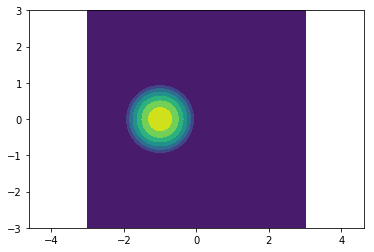

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')


r=np.linspace(-3,3,1000)
rp,ip=np.meshgrid(r,r)
temp=(1+rp)**2 + ip**2
plt.contourf(rp,ip,(temp<=1)*(1-temp))
plt.axis('equal')

plt.show()






This *disc* in the complex plane is simply $|1+z|\leq 1$, so the forward Euler method is stable for real-valued (negative) lambda for timesteps where $\Delta t \leq |\lambda|^{-1}$.  Thus, if $\lambda$ is a large negative value, we have to take **very** small timesteps to stay stable.

The second point is that for "orbital" problems(pure imaginary eigenvalues),  there is no stable timestep (as we need $z=0$, so if $\lambda = ci$ we will need $\Delta t\rightarrow 0$.  

We saw this in the harmonic oscillator example, where the harmonic osciallator slowly gathered energy when integrated using forward Euler.  Decreasing the timestep will decrease the energy growth, but can never supress it.


## Backward (Implicit Euler)

Backward Euler has 
$$
y_{n+1}=y_n + \Delta t \lambda y_{n+1},
$$
or
$$
y_{n+1}= \frac{1}{1-\lambda \Delta t} y_n
$$
so to stable we need $|1-z|^{-1}\leq 1$, which is true for all $z$ that we care about ($Re(z) < 0$).  



Assuming a multistep ODE of the form 
$$
a_{n+1}x_{n+1}-a_n x_n -a_{n-1} x_{n-1} + \ldots a_{n-k}x_{n-k}=b_nf(x_n)+ b_{n-1}f(x_{n-1}+ \ldots b_{n-k}f(x_{n-k})
$$

## Heun (RK2) method

If we write it out for our scalar linear system, we have(remember that 
$f(y_n)=\lambda y_n$

so we have
$$
y_{n+1} = y_n + \frac{\Delta t}{2} \lambda y_n + \frac{\Delta t}{2} \lambda \tilde{y}_n
$$
where
$$
\tilde{y}_n = y_n + \Delta t \lambda y_n
$$
plugging in and  simplifying yields
$$
y_{n+1} = (1 + \Delta t \lambda + \frac{1}{2}(\Delta t \lambda )^2) y_n
$$ 
so for stability we will need
$$
|1+z+\frac{1}{2}z^2| \leq 1.
$$



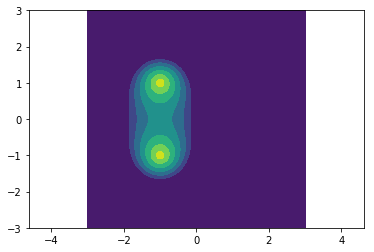

[[-3.         -2.99399399 -2.98798799 ...,  2.98798799  2.99399399  3.        ]
 [-3.         -2.99399399 -2.98798799 ...,  2.98798799  2.99399399  3.        ]
 [-3.         -2.99399399 -2.98798799 ...,  2.98798799  2.99399399  3.        ]
 ..., 
 [-3.         -2.99399399 -2.98798799 ...,  2.98798799  2.99399399  3.        ]
 [-3.         -2.99399399 -2.98798799 ...,  2.98798799  2.99399399  3.        ]
 [-3.         -2.99399399 -2.98798799 ...,  2.98798799  2.99399399  3.        ]]


In [12]:
r=np.linspace(-3,3,1000)
rp,ip=np.meshgrid(r,r)
z=rp + 1j*ip
        
    
    
temp=np.absolute(1+z+.5*z**2)
plt.contourf(rp,ip,(temp<=1)*(1-temp))
plt.axis('equal')

plt.show()

Note that the stability region for real $z$ is still part of the real axis (we get $1+z+.5z^2=1$ and $1+z+.5z^2=-1$) as constraints.  The 2nd constraint as no real roots so we get $-2\leq z \leq 0$, just as with forward Euler.  

But on the imaginary axis, we have $z=ci$,so
$$ (1-.5c^2)^2 + c^2 \leq 1 \rightarrow (1+.25c^4) < 1
$$
which means that the imaginary axis is not stable for any timestep, but it is *much closer* to being stable for small $\delta t$.  We 
show this for a harmonic oscillator example:
$$
x_1^\prime=x_2; \quad x_2^\prime=-x_1, \quad \vec{x}(t=0)=[1,0]
$$



In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#generic explicit RK interface

#Butcher class object:

class Butcher:
    def __init__(self,A=np.array([0]),b=np.array([1]),c=np.array([0])): # constructor, butcher coefficients, default = FE.
        self.A=A  #BUTCHER TABLE ENTRIES
        self.b=b
        self.c=c

        #GENERIC RK STEP
    def step(self,state,func,t,dt=.1):  #state=solution vector, func=rhs funciton
        stages=np.zeros((self.b.size,state.size))
        stages[0]=func(state,t)
        #compute stages
        for stage_count in range(1,self.b.size):
            temp=np.copy(state)
            for loop in range(stage_count):
                temp+=dt*self.A[stage_count,loop]*stages[loop]
            stages[stage_count]=func(temp,t+dt*self.c[stage_count])
        #sum stages
        new_state=state+dt*np.dot(self.b,stages)
        return new_state

In [47]:
init=np.array([1.0,0])
dt=.5
t=0

def rhs(x,t):
    RHS_MAT=np.array([[0,1],[-1,0]])  # eigevalues of +- i
    #RHS_MAT=np.array([[0,1],[-10,0]])
    return np.dot(RHS_MAT,x)

#test
print(rhs(init,0))
state=np.copy(init)
state_heun=np.copy(init)

[ 0. -1.]


1


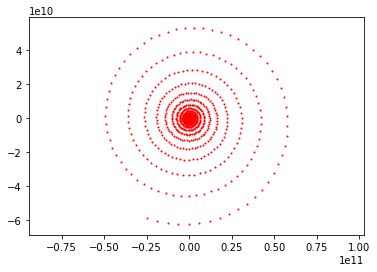

In [48]:
#initialize RK0 
rk1=Butcher() #forward euler
#print(type(rk0.A))
print((rk1.A).size)
heun=Butcher(A=np.array([[0,0],[1,0]]),b=np.array([.5,.5]), c=np.array([0,1]))
plt.figure()
timestep=1E-1
while t<500:
    state=rk1.step(state,rhs,t,dt=timestep)
    state_heun=heun.step(state_heun,rhs,t,dt=timestep)
    plt.scatter(state[0],state[1],c='r',s=1)
    #plt.scatter(state_heun[0],state_heun[1],c='g',s=.1)
    t+=timestep
plt.axis('equal')

cir1=plt.Circle((0,0),1,fill=False,color='b')
ax=plt.gca()
ax.add_artist(cir1)
plt.show()

So here we have the slow growth of the solution away from the stable 
orbit $x_1^2+x_2^2=1$.